In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get data

In [2]:
# read data from csv file
fake_transaction = pd.read_csv('fake_transactional_data_24.csv')

# EDA

In [3]:
# sort value from date to see starting and ending date in data
fake_transaction.sort_values('not_happened_yet_date')

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
13385,98994.0,2.65,COFFEE_SHOP,01/01/2025
13384,98994.0,2.20,A_LOCAL_COFFEE_SHOP,01/01/2025
13383,34189.0,14.50,BAR,01/01/2025
13382,86417.0,4.35,COFFEE_SHOP,01/01/2025
...,...,...,...,...
10137340,60186.0,2.65,35802,31/12/2025
10137341,48432.0,2.45,COFFEE_SHOP,31/12/2025
10137342,35802.0,5.30,COFFEE_SHOP,31/12/2025
10137248,42065.0,6.00,83201,31/12/2025


In [5]:
# check data types
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


the not_happened_yet_date column is not datetime type but it is object

In [6]:
# convert 'not_happened_yet_date' column (object type) to datetime type
fake_transaction['not_happened_yet_date'] = pd.to_datetime(fake_transaction['not_happened_yet_date'], format='%d/%m/%Y')
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      float64       
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 309.7+ MB


 ## find average money spend by month from each account

In [7]:
# extract month from the 'not_happened_yet_date' column
fake_transaction['transaction_month'] = fake_transaction['not_happened_yet_date'].dt.month
fake_transaction['transaction_year'] = fake_transaction['not_happened_yet_date'].dt.year

# group by month and calculate the average transaction amount
average_amount_by_month = fake_transaction.groupby(['from_totally_fake_account', 'transaction_month'])['monopoly_money_amount'].mean()

print(average_amount_by_month)

from_totally_fake_account  transaction_month
1000.0                     1                    17.769103
                           2                    18.838758
                           3                    14.192364
                           4                    14.217955
                           5                    16.312301
                                                  ...    
100988.0                   8                    14.415319
                           9                    15.914783
                           10                   15.452752
                           11                   15.529531
                           12                   15.391210
Name: monopoly_money_amount, Length: 97704, dtype: float64


 ## Scatter plot of sample dataset in order to see the money trend from particular account

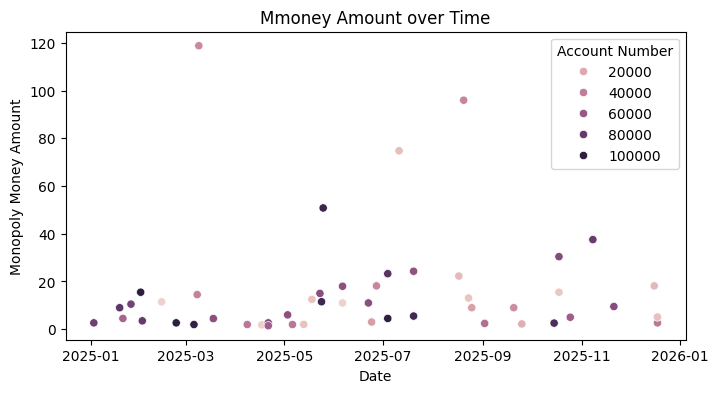

In [8]:
# sample a subset of the data for plotting
sample_data = fake_transaction.sample(n=50, random_state = 10)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sample_data)
plt.title('Mmoney Amount over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account Number')
plt.show()

Some account such as Account Number 40000 has abnormal spending in 2025-01 and also 2025-03, it migh be fraund or ,marketing campaign in that month

 ## Line Plot (same as above)

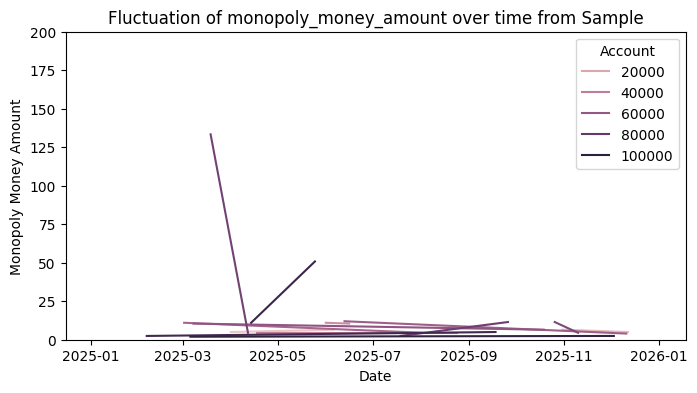

In [9]:
# sample a subset of data for plotting line graph
sampled_data = fake_transaction.sample(n=500, random_state = 10)

plt.figure(figsize=(8, 4))
sns.lineplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sampled_data, markers=True)
plt.title('Fluctuation of monopoly_money_amount over time from Sample')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account')
plt.ylim(0,200)
plt.show()

very unclear, but various line are flat, which mean the trend of spending money has no change in each account.


# Time Serie

## plot weekly avg. with monthly avg.

Plot weekly average overall in each month with monthly average (changing graph from plot monthly average last week) 

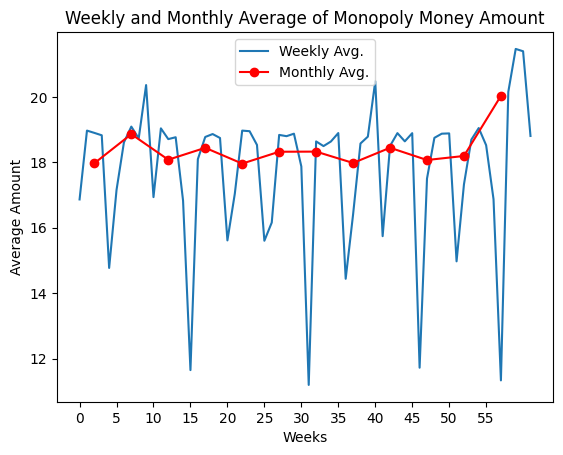

In [10]:
fake_transaction['transaction_week'] = fake_transaction['not_happened_yet_date'].dt.isocalendar().week

# calculate weekly and monthly averages
weekly_avg = fake_transaction.groupby(['transaction_year', 'transaction_month', 'transaction_week'])['monopoly_money_amount'].mean().reset_index() # consider if we have various year 
monthly_avg = fake_transaction.groupby(['transaction_year', 'transaction_month'])['monopoly_money_amount'].mean().reset_index()

fig, ax = plt.subplots()
ax.plot(weekly_avg.index, weekly_avg['monopoly_money_amount'], label='Weekly Avg.')
# assume 1 month has 5 weeks and avg first month at week 2
ax.plot(2 + monthly_avg.index * 5, monthly_avg['monopoly_money_amount'], marker='o', linestyle='-', color='r', label='Monthly Avg.')

# set x-axis label to represent months multiplied by 5
month_labels = [label * 5 for label in range(len(monthly_avg['transaction_month']))]
ax.set_xticks(month_labels)

ax.set_xlabel('Weeks')
ax.set_ylabel('Average Amount')
ax.set_title('Weekly and Monthly Average of Monopoly Money Amount')
ax.legend()

plt.show()


In [11]:
weekly_avg.tail(10) # it might because the 1st week of January is being counted as part of December (weakness of isocalendar())

,transaction_year,transaction_month,transaction_week,monopoly_money_amount
52,2025,11,44,17.324033
53,2025,11,45,18.692746
54,2025,11,46,19.047502
55,2025,11,47,18.522565
56,2025,11,48,16.870010
57,2025,12,1,11.330995
58,2025,12,49,20.155405
59,2025,12,50,21.466803
60,2025,12,51,21.395351
61,2025,12,52,18.805227


People tend to spend high in each transection in december

Plot Weekly Sum and Monthly Average in the same graph to see what the trend is? (it seems the middle of the month people will spend money less than starting and ending month) 

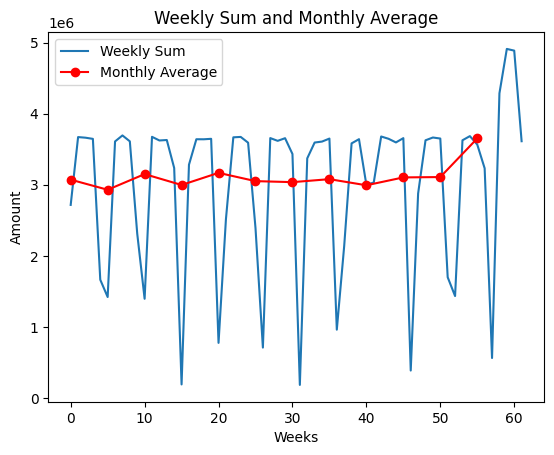

In [12]:
# calculate weekly sums
weekly_sum = fake_transaction.groupby(['transaction_year', 'transaction_month', 'transaction_week'])['monopoly_money_amount'].sum().reset_index()

# combine weekly sums to monthly level
monthly_avg = weekly_sum.groupby(['transaction_year', 'transaction_month']).agg({'monopoly_money_amount': 'sum'}).reset_index()
monthly_avg['monopoly_money_amount'] /= 5  # assume 1 month has 5 weeks

fig, ax = plt.subplots()
ax.plot(weekly_sum.index, weekly_sum['monopoly_money_amount'], label='Weekly Sum')

ax.plot([5 * i for i in range(len(monthly_avg))], monthly_avg['monopoly_money_amount'], marker='o', linestyle='-', color='r', label='Monthly Average')

ax.set_xlabel('Weeks')
ax.set_ylabel('Amount')
ax.set_title('Weekly Sum and Monthly Average')
ax.legend()

plt.show()


In [13]:
data_time = fake_transaction.set_index('not_happened_yet_date', inplace=False)
data_time

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,transaction_month,transaction_year,transaction_week
not_happened_yet_date,,,,,,
2025-01-01,10371.0,4.00,CINEMA,1,2025,1
2025-01-01,88339.0,2.40,40544,1,2025,1
2025-01-01,18555.0,2.40,85149,1,2025,1
2025-01-01,18555.0,4.10,HIPSTER_COFFEE_SHOP,1,2025,1
2025-01-01,80792.0,1.95,18555,1,2025,1
...,...,...,...,...,...,...
2025-12-31,32185.0,2.65,COFFEE_SHOP,12,2025,1
2025-12-31,32185.0,2.45,COFFEE_SHOP,12,2025,1
2025-12-31,57569.0,14.00,WINE_BAR,12,2025,1


Normalize data to let all months have 30 days in total and plot the monthly trend. 

Before normalize
                       monthly_sum  days
not_happened_yet_date                   
2025-01-31             15356512.85    31
2025-02-28             14645381.97    28
2025-03-31             15746678.39    31
2025-04-30             14981481.00    30
2025-05-31             15835541.72    31
2025-06-30             15252728.86    30
2025-07-31             15181448.00    31
2025-08-31             15391387.82    31
2025-09-30             14961001.77    30
2025-10-31             15514159.54    31
2025-11-30             15538928.68    30
2025-12-31             18256984.89    31
After normalize
                       monthly_sum  days
not_happened_yet_date                   
2025-01-31             14861141.47    30
2025-02-28             15691480.68    30
2025-03-31             15238721.02    30
2025-04-30             14981481.00    30
2025-05-31             15324717.79    30
2025-06-30             15252728.86    30
2025-07-31             14691723.87    30
2025-08-31             1

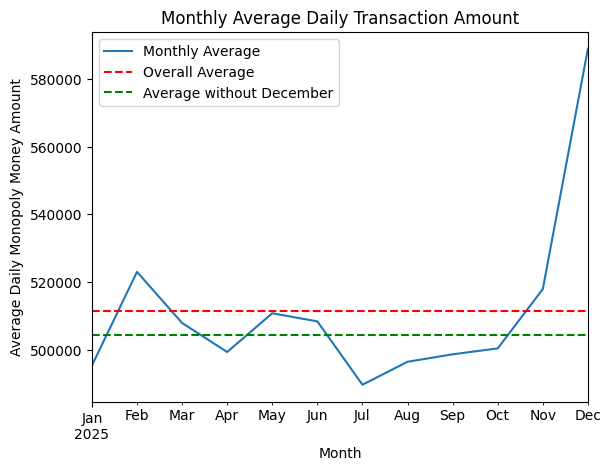

In [14]:
monthly_sum = data_time['monopoly_money_amount'].resample('M').sum()
monthly_days = data_time.index.to_series().resample('M').nunique()
monthly_days.loc['2025-08-31'] += 1
new = pd.DataFrame({'monthly_sum': monthly_sum, 'days': monthly_days})
print("Before normalize")
print(new)

# normalize data to let all months have 30 days in total
new['monthly_sum'] = new['monthly_sum'] * 30 / new['days']

if (new['days'] != 30).any():
    new['days'] = 30
else:
    pass

print("After normalize")
pd.set_option('display.float_format', '{:.2f}'.format)
print(new)

# finding monthly average in each month
monthly_average = new['monthly_sum'] / new['days']

# find overall average from monthly average
overall_average = monthly_average.mean()

# find the overall average without December
monthly_average_without_december = monthly_average[monthly_average.index.month != 12]
overall_average_without_december = monthly_average_without_december.mean()

monthly_average.plot()
plt.axhline(y=overall_average, color='r', linestyle='--')
plt.axhline(y=overall_average_without_december, color='g', linestyle='--')

plt.title('Monthly Average Daily Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Average Daily Monopoly Money Amount')
plt.legend(['Monthly Average', 'Overall Average', 'Average without December'])
plt.savefig('Feb after.png', dpi=300, bbox_inches='tight') 
plt.show()


##  monthly total amounth in one place 

Plot monthly total amount in top 10 places in each moth to see which places that people spending most in each month 

In [15]:
# calculate the monthly total amounth of monopoly_money_amount for each to_randomly_generated_account
monthly_sum = fake_transaction.groupby(['to_randomly_generated_account', 'transaction_month'])['monopoly_money_amount'].sum().reset_index()

print(monthly_sum)


       to_randomly_generated_account  transaction_month  monopoly_money_amount
0                               1000                  1                 727.95
1                               1000                  2                 775.45
2                               1000                  3                 749.00
3                               1000                  4                 760.75
4                               1000                  5                 745.65
...                              ...                ...                    ...
170635                   WINE_CELLAR                  8                8590.82
170636                   WINE_CELLAR                  9                9602.72
170637                   WINE_CELLAR                 10                9572.62
170638                   WINE_CELLAR                 11                9717.53
170639                   WINE_CELLAR                 12              126309.76

[170640 rows x 3 columns]


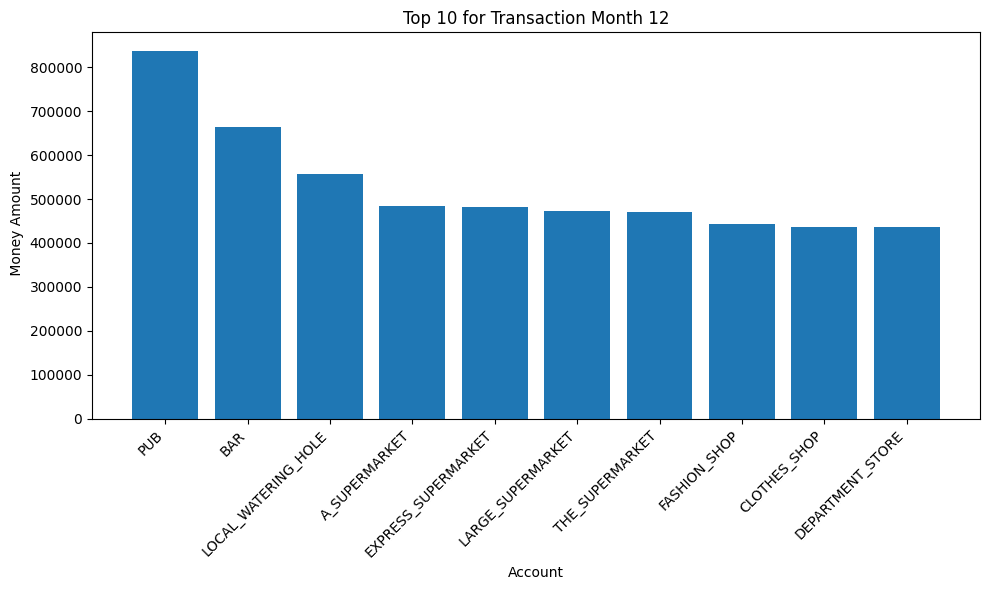

In [16]:
def plot_test(month):
    
    # filter the dataset for transaction_month 1
    month_1 = monthly_sum[monthly_sum['transaction_month'] == month]

    # sort the values by monopoly_money_amount (descending order)
    sorted_month_1 = month_1.sort_values(by='monopoly_money_amount', ascending=False)

    # top 10 of to_randomly_generated_account
    top_10 = sorted_month_1.head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_10['to_randomly_generated_account'], top_10['monopoly_money_amount'])
    plt.xlabel('Account')
    plt.ylabel(' Money Amount')
    plt.title(f'Top 10 for Transaction Month {month}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    
    plt.savefig('top10_m12.png', dpi=300, bbox_inches='tight') 
    plt.show()
    
plot_test(12)

## find weekend and weekday to show people spending most 

In [17]:
# extract day of the week (0 = Monday, 6 = Sunday)
fake_transaction['day_of_week'] = fake_transaction['not_happened_yet_date'].dt.dayofweek

# create function to categorize weekdays and weekends
def categorize_day(day):
    if day < 5:  # fot monday to friday
        return 'weekday'
    else: # others
        return 'weekend'

# use this function to create new column
fake_transaction['week_or_day'] = fake_transaction['day_of_week'].apply(categorize_day)

fake_transaction

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,transaction_year,transaction_week,day_of_week,week_or_day
0,10371.00,4.00,CINEMA,2025-01-01,1,2025,1,2,weekday
1,88339.00,2.40,40544,2025-01-01,1,2025,1,2,weekday
2,18555.00,2.40,85149,2025-01-01,1,2025,1,2,weekday
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2025,1,2,weekday
4,80792.00,1.95,18555,2025-01-01,1,2025,1,2,weekday
...,...,...,...,...,...,...,...,...,...
10148275,32185.00,2.65,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday
10148276,32185.00,2.45,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday
10148277,57569.00,14.00,WINE_BAR,2025-12-31,12,2025,1,2,weekday
10148278,1490.00,9.00,57569,2025-12-31,12,2025,1,2,weekday


In [18]:
fake_transaction[fake_transaction['not_happened_yet_date'] ==  '2025-01-06']

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,transaction_year,transaction_week,day_of_week,week_or_day
161054,91431.00,22.00,TOY_SHOP,2025-01-06,1,2025,2,0,weekday
161055,88569.00,2.20,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
161056,51766.00,2.65,COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
161057,11008.00,2.40,A_CAFE,2025-01-06,1,2025,2,0,weekday
161058,71234.00,5.10,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
...,...,...,...,...,...,...,...,...,...
177813,13278.00,2.65,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
177814,27046.00,1.45,GOURMET_COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
177815,27046.00,2.40,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-06,1,2025,2,0,weekday
177816,77699.00,1.45,A_CAFE,2025-01-06,1,2025,2,0,weekday


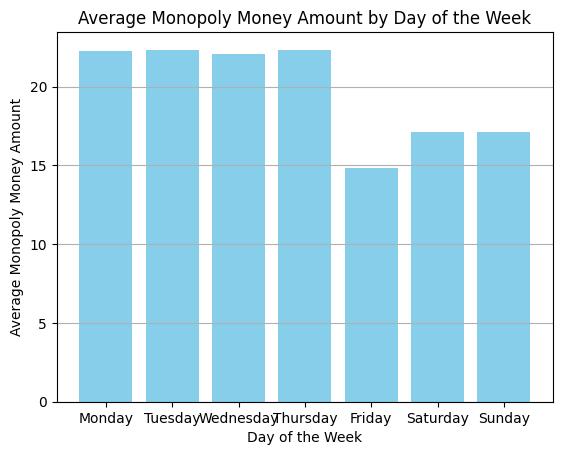

In [19]:
# average Monopoly Money Amount for each day of the week
daily_avg = fake_transaction.groupby('day_of_week')['monopoly_money_amount'].mean()

# day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure()
plt.bar(day_labels, daily_avg, color='skyblue')
plt.title('Average Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Monopoly Money Amount')
plt.grid(axis='y')
plt.show()


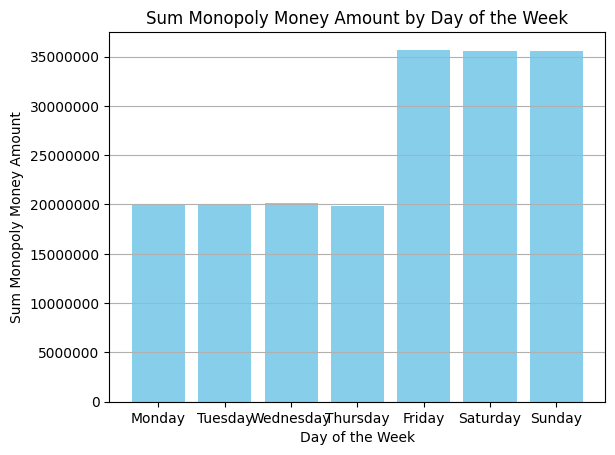

In [20]:
# average Monopoly Money Amount for each day of the week
daily_avg = fake_transaction.groupby('day_of_week')['monopoly_money_amount'].sum()

# day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure()
plt.bar(day_labels, daily_avg, color='skyblue')
plt.title('Sum Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sum Monopoly Money Amount')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')

plt.savefig('Sum Money Amount by Day of the Week.png', dpi=300, bbox_inches='tight') 
plt.show()


Find weekend and weekday to show people spending most and looking for the most category that people spend too much in weekend or weekday. 

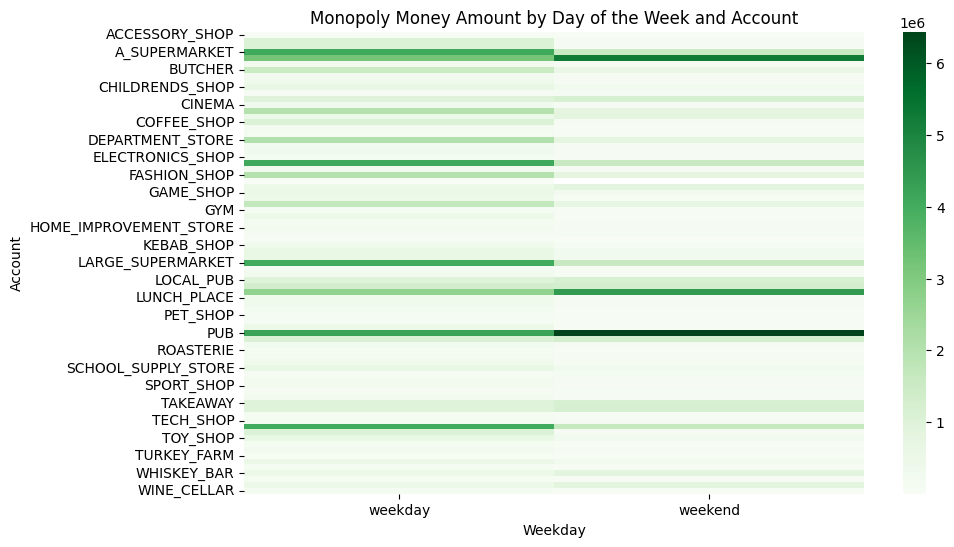

In [21]:
# remove numerical values from 'to_randomly_generated_account'
fake_transaction['to_randomly_generated_account'] = fake_transaction['to_randomly_generated_account'].apply(lambda x: x if not x.isdigit() else 'Other')
new_fake_transaction = fake_transaction[fake_transaction['to_randomly_generated_account'] != 'Other']

# pivot the data
heatmap_data = new_fake_transaction.pivot_table(index='to_randomly_generated_account', columns='week_or_day', values='monopoly_money_amount', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, cmap='Greens')
plt.title('Monopoly Money Amount by Day of the Week and Account')
plt.xlabel('Weekday')
plt.ylabel('Account')

plt.savefig('Money Amount by Day of the Week and Account.png', dpi=300, bbox_inches='tight') 
plt.show()



 ## z-score for extream data detection (detect extreme data by examining the tails)

In [22]:
# calculate mean and standard deviation
mean_amount = fake_transaction['monopoly_money_amount'].mean()
std_amount = fake_transaction['monopoly_money_amount'].std()

# calculate z-scores
fake_transaction['z_score'] = (fake_transaction['monopoly_money_amount'] - mean_amount) / std_amount

# set threshold for anomaly detection
threshold = std_amount

# detect anomalies based on the threshold
extreme = fake_transaction[abs(fake_transaction['z_score']) > threshold]

print(extreme)




Empty DataFrame
Columns: [from_totally_fake_account, monopoly_money_amount, to_randomly_generated_account, not_happened_yet_date, transaction_month, transaction_year, transaction_week, day_of_week, week_or_day, z_score]
Index: []


Cannot detect by using distribution

## Import new table called 'holidays'

In [23]:
holidays = pd.read_csv('holidays.csv')
holidays

,date,holiday
0,2012-01-02,New Year's Day
1,2012-02-20,Family Day
2,2012-04-06,Good Friday
3,2012-05-21,Victoria Day
4,2012-07-02,Canada Day
...,...,...
193,2025-12-25,Christmas Day
194,2025-12-26,Boxing Day
195,2025-12-29,Additional Day
196,2025-12-30,Additional Day


In [24]:
# check type
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     198 non-null    object
 1   holiday  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [25]:
# convert date columnfrom object type into datetime64
holidays['date'] = pd.to_datetime(holidays['date'], format='%Y-%m-%d')
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     198 non-null    datetime64[ns]
 1   holiday  198 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.2+ KB


In [26]:
# check year in our data to collect particular year from holidays dataframe
fake_transaction['not_happened_yet_date'].dt.year.unique()

array([2025], dtype=int32)

There is only 2025, so I will filter only 2025 from holidays table

In [27]:
holidays['year'] = holidays['date'].dt.year
holidays = holidays[holidays['year'] == 2025]
holidays

,date,holiday,year
183,2025-01-01,New Year's Day,2025
184,2025-02-17,Family Day,2025
185,2025-04-18,Good Friday,2025
186,2025-05-19,Victoria Day,2025
187,2025-06-30,Additional Day,2025
188,2025-07-01,Canada Day,2025
189,2025-08-04,Civic Holiday,2025
190,2025-09-01,Labour Day,2025
191,2025-10-13,Thanksgiving,2025
192,2025-12-24,Additional Day,2025


In [28]:
# remove irrelavant row (Canada Day, Victoria Day)
holidays = holidays[holidays['holiday'] != "Canada Day"]
holidays = holidays[holidays['holiday'] != "Victoria Day"]
holidays = holidays[holidays['holiday'] != "Additional Day"]
holidays = holidays[holidays['holiday'] != "Labour Day"]
holidays = holidays[holidays['holiday'] != "Civic Holiday"]
holidays = holidays[holidays['holiday'] != "Family Day"]
holidays = holidays[holidays['holiday'] != "Thanksgiving"]

uk_holidays = {
    'date': ['2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday'],
    'year': [2025, 2025, 2025, 2025, 2025]
}

uk_holidays = pd.DataFrame(uk_holidays)

holidays = pd.concat([holidays, uk_holidays], ignore_index=True)
holidays['date'] = pd.to_datetime(holidays['date'], format='%Y-%m-%d')

holidays

,date,holiday,year
0,2025-01-01,New Year's Day,2025
1,2025-04-18,Good Friday,2025
2,2025-12-25,Christmas Day,2025
3,2025-12-26,Boxing Day,2025
4,2025-04-18,Good Friday,2025
5,2025-04-21,Easter Monday,2025
6,2025-05-05,Early May bank holiday,2025
7,2025-05-26,Spring bank holiday,2025
8,2025-08-25,Summer bank holiday,2025


## Merge fake_transaction and holidays table by using leftjoin for futher EDA

In [29]:
# merge two table by using leftjoin
merged_df = pd.merge(fake_transaction, holidays, how='left', left_on='not_happened_yet_date', right_on='date')

# replace null values in the holiday column with "Normal Day"
merged_df['holiday'] = merged_df['holiday'].fillna("Normal Day")
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,transaction_year,transaction_week,day_of_week,week_or_day,z_score,date,holiday,year
0,10371.00,4.00,CINEMA,2025-01-01,1,2025,1,2,weekday,-0.17,2025-01-01,New Year's Day,2025.00
1,88339.00,2.40,Other,2025-01-01,1,2025,1,2,weekday,-0.19,2025-01-01,New Year's Day,2025.00
2,18555.00,2.40,Other,2025-01-01,1,2025,1,2,weekday,-0.19,2025-01-01,New Year's Day,2025.00
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2025,1,2,weekday,-0.17,2025-01-01,New Year's Day,2025.00
4,80792.00,1.95,Other,2025-01-01,1,2025,1,2,weekday,-0.19,2025-01-01,New Year's Day,2025.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194406,32185.00,2.65,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday,-0.18,NaT,Normal Day,NaN
10194407,32185.00,2.45,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday,-0.19,NaT,Normal Day,NaN
10194408,57569.00,14.00,WINE_BAR,2025-12-31,12,2025,1,2,weekday,-0.05,NaT,Normal Day,NaN
10194409,1490.00,9.00,Other,2025-12-31,12,2025,1,2,weekday,-0.11,NaT,Normal Day,NaN


In [30]:
# drop irrelavant columns
merged_df = merged_df.drop(columns=['date', 'year','transaction_month', 'z_score'])
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_year,transaction_week,day_of_week,week_or_day,holiday
0,10371.00,4.00,CINEMA,2025-01-01,2025,1,2,weekday,New Year's Day
1,88339.00,2.40,Other,2025-01-01,2025,1,2,weekday,New Year's Day
2,18555.00,2.40,Other,2025-01-01,2025,1,2,weekday,New Year's Day
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,2025,1,2,weekday,New Year's Day
4,80792.00,1.95,Other,2025-01-01,2025,1,2,weekday,New Year's Day
...,...,...,...,...,...,...,...,...,...
10194406,32185.00,2.65,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Normal Day
10194407,32185.00,2.45,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Normal Day
10194408,57569.00,14.00,WINE_BAR,2025-12-31,2025,1,2,weekday,Normal Day
10194409,1490.00,9.00,Other,2025-12-31,2025,1,2,weekday,Normal Day


In [31]:
pivot_table = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='sum')
pivot_table.sort_values(by='monopoly_money_amount', ascending=False)

,monopoly_money_amount
to_randomly_generated_account,
Other,81537306.40
PUB,10699080.12
BAR,8509034.50
LOCAL_WATERING_HOLE,7159024.50
EXPRESS_SUPERMARKET,5717124.06
...,...
PET_TOY_SHOP,185839.00
TURKEY_FARM,98280.00
ACCESSORY_SHOP,74980.00


## explore money spend on each account in each holiday


In [32]:
# explore money spend on each account in each holiday
pivot_table = merged_df.pivot_table(index='to_randomly_generated_account', columns='holiday', values='monopoly_money_amount', aggfunc='sum')
pivot_table.sort_values(by='to_randomly_generated_account', ascending = False).head(10)

holiday,Boxing Day,Christmas Day,Early May bank holiday,Easter Monday,Good Friday,New Year's Day,Normal Day,Spring bank holiday,Summer bank holiday
to_randomly_generated_account,,,,,,,,,
WINE_CELLAR,249.95,243.92,372.88,197.93,797.84,223.95,230453.81,64.98,333.91
WINE_BAR,8727.50,382.00,515.50,347.50,16095.00,396.00,1333876.50,386.50,512.50
WHISKEY_SHOP,228.94,337.93,316.92,228.94,721.82,259.93,232405.97,169.94,295.95
WHISKEY_BAR,7496.00,502.00,461.50,469.50,16207.00,407.50,1345414.50,465.00,415.50
WE_HAVE_BEAN_WEIGHTING,361.38,373.18,470.00,489.10,930.00,181.83,234425.04,293.18,339.98
VIDEO_GAME_STORE,1787.00,1848.00,2081.00,1520.00,4498.00,1716.00,755776.00,1670.00,1765.00
TURKEY_FARM,NaN,NaN,NaN,NaN,NaN,NaN,98280.00,NaN,NaN
TRAINER_SHOP,885.00,797.00,615.00,1095.00,1308.00,995.00,286961.00,664.00,817.00
TO_BEAN_OR_NOT_TO_BEAN,359.55,211.83,203.19,302.27,1027.28,64.09,234331.67,97.28,340.47


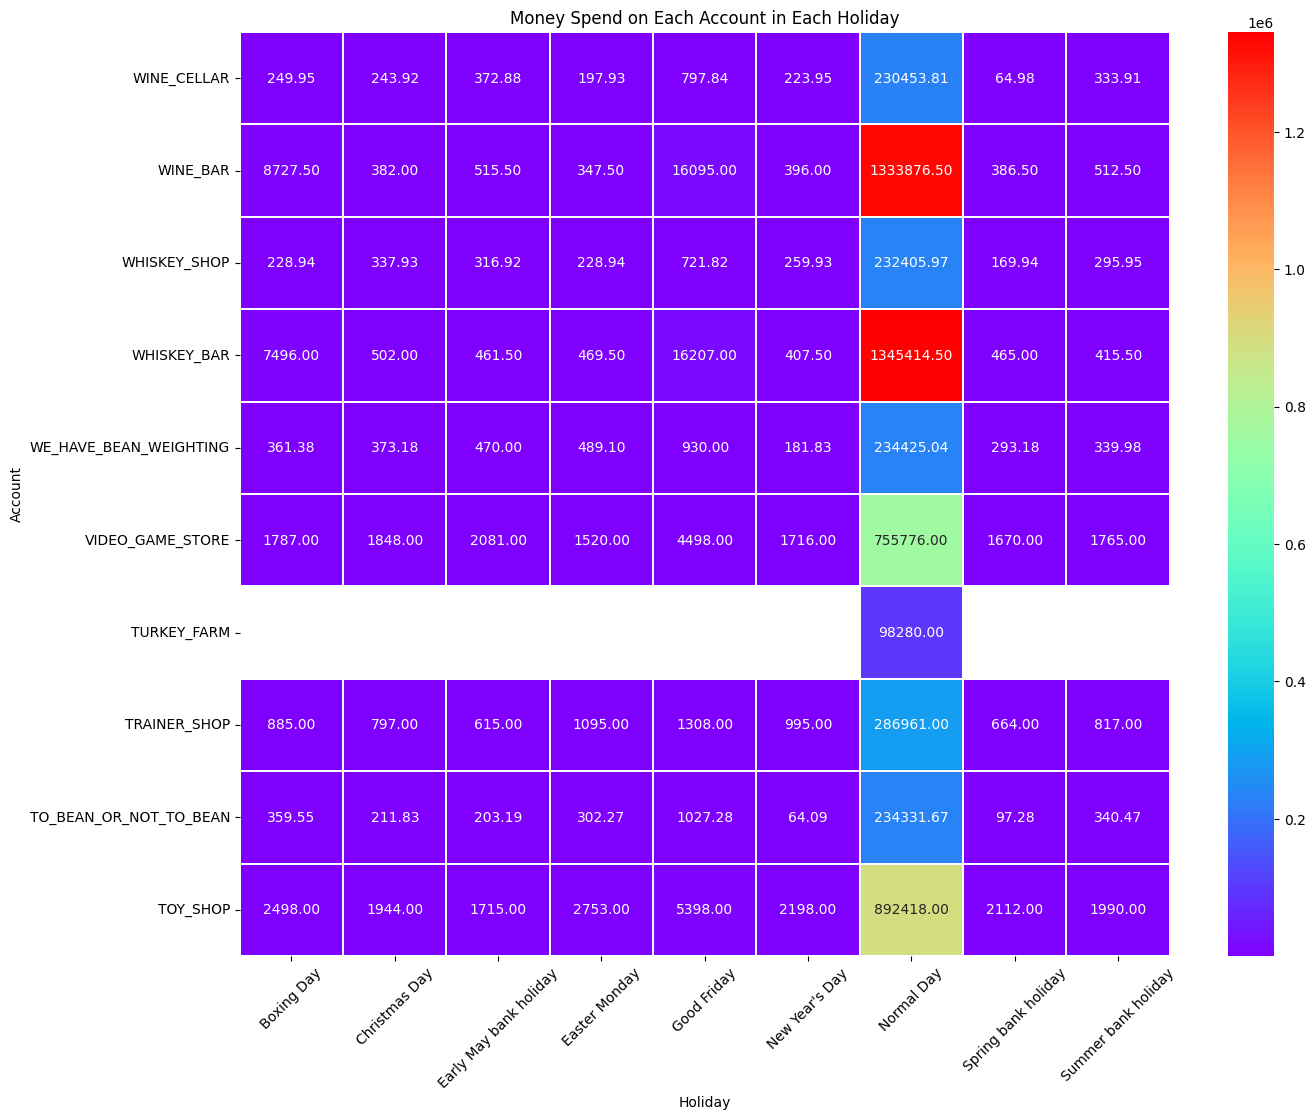

In [33]:
topten = pivot_table.sort_values(by='to_randomly_generated_account', ascending = False).head(10)
plt.figure(figsize=(15, 12))
sns.heatmap(topten, cmap='rainbow', annot=True, fmt=".2f", linewidths=.2)
plt.title('Money Spend on Each Account in Each Holiday')
plt.xlabel('Holiday')
plt.ylabel('Account')
plt.xticks(rotation=45)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
    
plt.show()



In [34]:
# read data from csv file
fake_transaction_map = pd.read_csv('bs_mapped_transactional_data_new_2.csv')
fake_transaction_map['not_happened_yet_date'] = pd.to_datetime(fake_transaction_map['not_happened_yet_date'], format='%d/%m/%Y')
fake_transaction_map

,Unnamed: 0,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,group
0,0,10371.00,4.00,CINEMA,2025-01-01,Cinema
1,1,88339.00,2.40,40544,2025-01-01,NaN
2,2,18555.00,2.40,85149,2025-01-01,NaN
3,3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,Cafe
4,4,80792.00,1.95,18555,2025-01-01,NaN
...,...,...,...,...,...,...
10148275,10148275,32185.00,2.65,COFFEE_SHOP,2025-12-31,Cafe
10148276,10148276,32185.00,2.45,COFFEE_SHOP,2025-12-31,Cafe
10148277,10148277,57569.00,14.00,WINE_BAR,2025-12-31,Bar
10148278,10148278,1490.00,9.00,57569,2025-12-31,NaN


In [35]:
merged_df_map = pd.merge(fake_transaction_map, holidays, how='left', left_on='not_happened_yet_date', right_on='date')

# replace null values in the holiday column with "Normal Day"
merged_df_map['holiday'] = merged_df_map['holiday'].fillna("Normal Day")
merged_df_map = merged_df_map.drop(columns=['date', 'year'])
pivot_table_map = merged_df_map.pivot_table(index='group', values='monopoly_money_amount', aggfunc='sum')
pivot_table_map.sort_values(by='monopoly_money_amount', ascending=False)# explore money spend on each account in each holiday



,monopoly_money_amount
group,
Supermarket,22692480.84
Bar,21152881.50
Restaurant/Takeaway,12940316.23
Pub,12837317.01
Cafe,6777627.75
Clothing Store,5684795.00
Children's Shop,4560927.00
Department Store,2882421.00
Butcher,2399143.38


In [36]:
pivot_table_map = merged_df_map.pivot_table(index='group', columns='holiday', values='monopoly_money_amount', aggfunc='sum')
pivot_table_map.sort_values(by='group', ascending = False).head(10)

holiday,Boxing Day,Christmas Day,Early May bank holiday,Easter Monday,Good Friday,New Year's Day,Normal Day,Spring bank holiday,Summer bank holiday
group,,,,,,,,,
Turkey Farm,NaN,NaN,NaN,NaN,NaN,NaN,98280.00,NaN,NaN
Tech Store,2027.00,2061.00,2108.00,1218.00,4492.00,1397.00,764320.00,1045.00,1019.00
Supermarket,57264.87,70402.53,59675.26,63065.44,101067.46,34447.06,22180665.12,61446.63,64446.47
Streaming Service,NaN,NaN,NaN,NaN,NaN,29550.13,325051.43,NaN,NaN
Sports Store,3072.00,2482.00,2662.00,3505.00,5976.00,2931.00,1137260.00,2858.00,2213.00
Roasterie/Tea Shop,1425.95,1079.54,1551.82,1354.10,3279.12,630.01,948236.09,773.17,1231.36
Restaurant/Takeaway,62572.91,11981.85,13392.70,12902.77,129402.72,11756.16,12673969.61,12739.36,11598.15
Pub,75493.70,7511.43,6343.12,7041.66,143089.54,6806.23,12576832.87,6954.45,7244.01
Pets,1170.00,881.00,979.00,902.00,2110.00,707.00,363164.00,1012.00,867.00


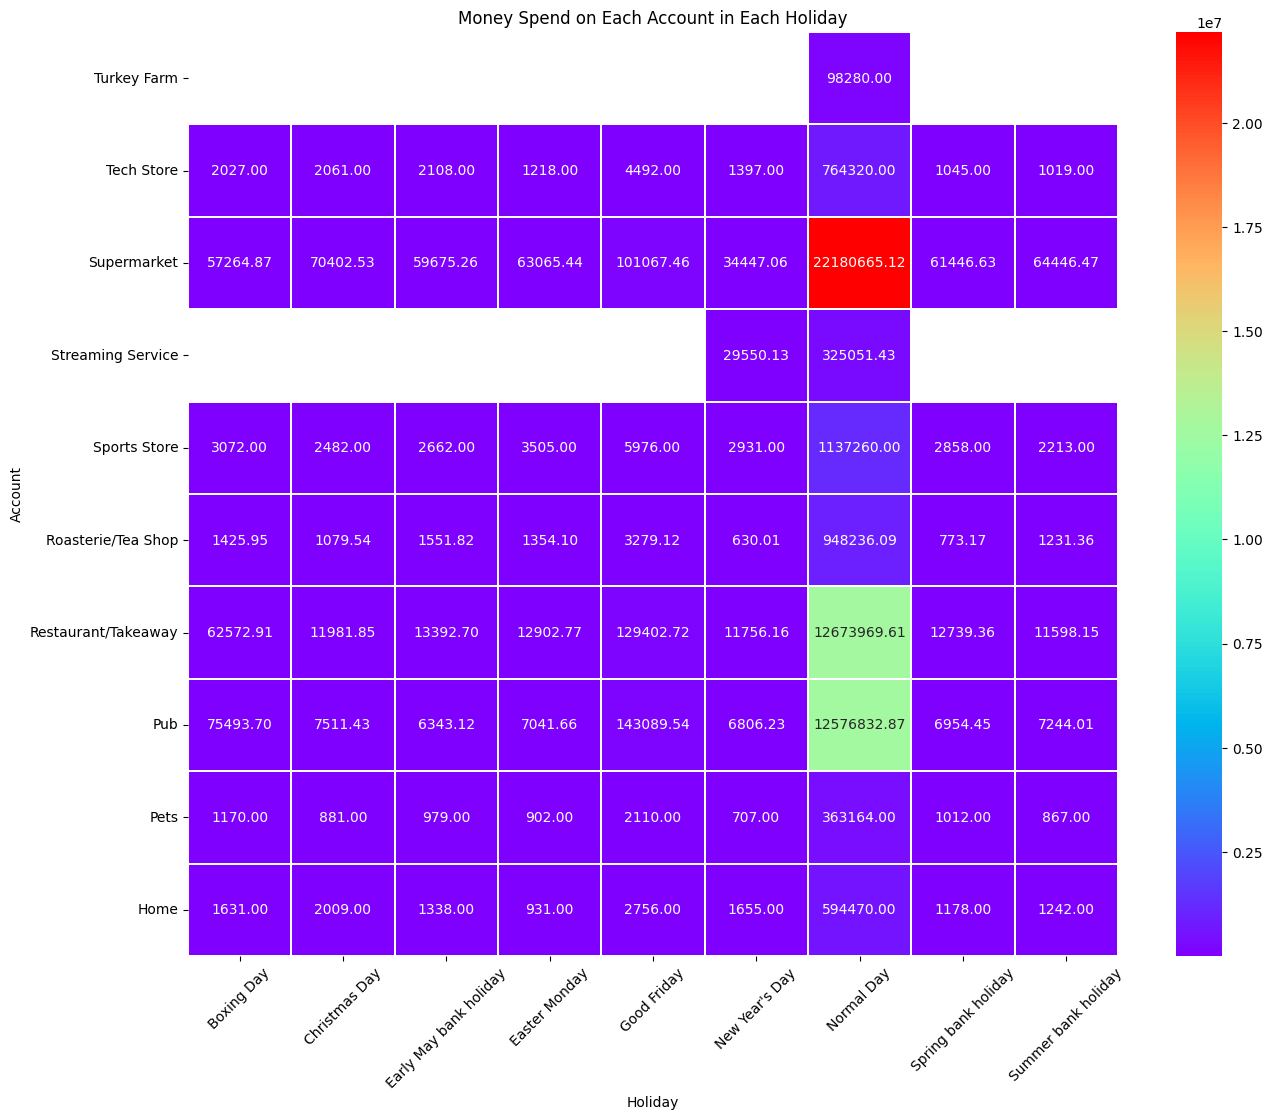

In [37]:
topten = pivot_table_map.sort_values(by='group', ascending = False).head(10)
plt.figure(figsize=(15, 12))
sns.heatmap(topten, cmap='rainbow', annot=True, fmt=".2f", linewidths=.2)
plt.title('Money Spend on Each Account in Each Holiday')
plt.xlabel('Holiday')
plt.ylabel('Account')
plt.xticks(rotation=45)

plt.savefig('heatmap_map.png', dpi=300, bbox_inches='tight')
    
plt.show()



In [38]:
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_year,transaction_week,day_of_week,week_or_day,holiday
0,10371.00,4.00,CINEMA,2025-01-01,2025,1,2,weekday,New Year's Day
1,88339.00,2.40,Other,2025-01-01,2025,1,2,weekday,New Year's Day
2,18555.00,2.40,Other,2025-01-01,2025,1,2,weekday,New Year's Day
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,2025,1,2,weekday,New Year's Day
4,80792.00,1.95,Other,2025-01-01,2025,1,2,weekday,New Year's Day
...,...,...,...,...,...,...,...,...,...
10194406,32185.00,2.65,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Normal Day
10194407,32185.00,2.45,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Normal Day
10194408,57569.00,14.00,WINE_BAR,2025-12-31,2025,1,2,weekday,Normal Day
10194409,1490.00,9.00,Other,2025-12-31,2025,1,2,weekday,Normal Day


In [55]:
# merge two table by using leftjoin
merged_df = pd.merge(fake_transaction, holidays, how='left', left_on='not_happened_yet_date', right_on='date')

# replace null values in the holiday column with "Normal Day"
merged_df['holiday'] = merged_df['holiday'].fillna("Normal Day")

merged_df = merged_df[['from_totally_fake_account','monopoly_money_amount','to_randomly_generated_account', 'not_happened_yet_date','week_or_day', 'holiday']]
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,week_or_day,holiday
0,10371.00,4.00,CINEMA,2025-01-01,weekday,New Year's Day
1,88339.00,2.40,Other,2025-01-01,weekday,New Year's Day
2,18555.00,2.40,Other,2025-01-01,weekday,New Year's Day
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,weekday,New Year's Day
4,80792.00,1.95,Other,2025-01-01,weekday,New Year's Day
...,...,...,...,...,...,...
10194406,32185.00,2.65,COFFEE_SHOP,2025-12-31,weekday,Normal Day
10194407,32185.00,2.45,COFFEE_SHOP,2025-12-31,weekday,Normal Day
10194408,57569.00,14.00,WINE_BAR,2025-12-31,weekday,Normal Day
10194409,1490.00,9.00,Other,2025-12-31,weekday,Normal Day


In [70]:
# filter out rows where the 'holiday' column is not equal to "Normal Day"
merged_df_date = merged_df[merged_df['holiday'] != "Normal Day"]

# pivot the filtered DataFrame based on the 'holiday' column
pivot_table_2 = merged_df_date.pivot_table(index='to_randomly_generated_account', columns='not_happened_yet_date', values='monopoly_money_amount', aggfunc='sum')

pivot_table_2 = pivot_table_2.sort_index(ascending=False)

print(pivot_table_2)


not_happened_yet_date          2025-01-01  2025-04-18  2025-04-21  2025-05-05  \
to_randomly_generated_account                                                   
WINE_CELLAR                        223.95      797.84      197.93      372.88   
WINE_BAR                           396.00    16095.00      347.50      515.50   
WHISKEY_SHOP                       259.93      721.82      228.94      316.92   
WHISKEY_BAR                        407.50    16207.00      469.50      461.50   
WE_HAVE_BEAN_WEIGHTING             181.83      930.00      489.10      470.00   
...                                   ...         ...         ...         ...   
BAR                               2954.50   101906.00     3077.50     2804.00   
A_SUPERMARKET                     8678.49    23899.54    17774.75    15290.47   
A_LOCAL_COFFEE_SHOP               4078.25     8083.00     3978.70     3817.35   
A_CAFE                            4093.00     8144.20     3960.50     3907.80   
ACCESSORY_SHOP              

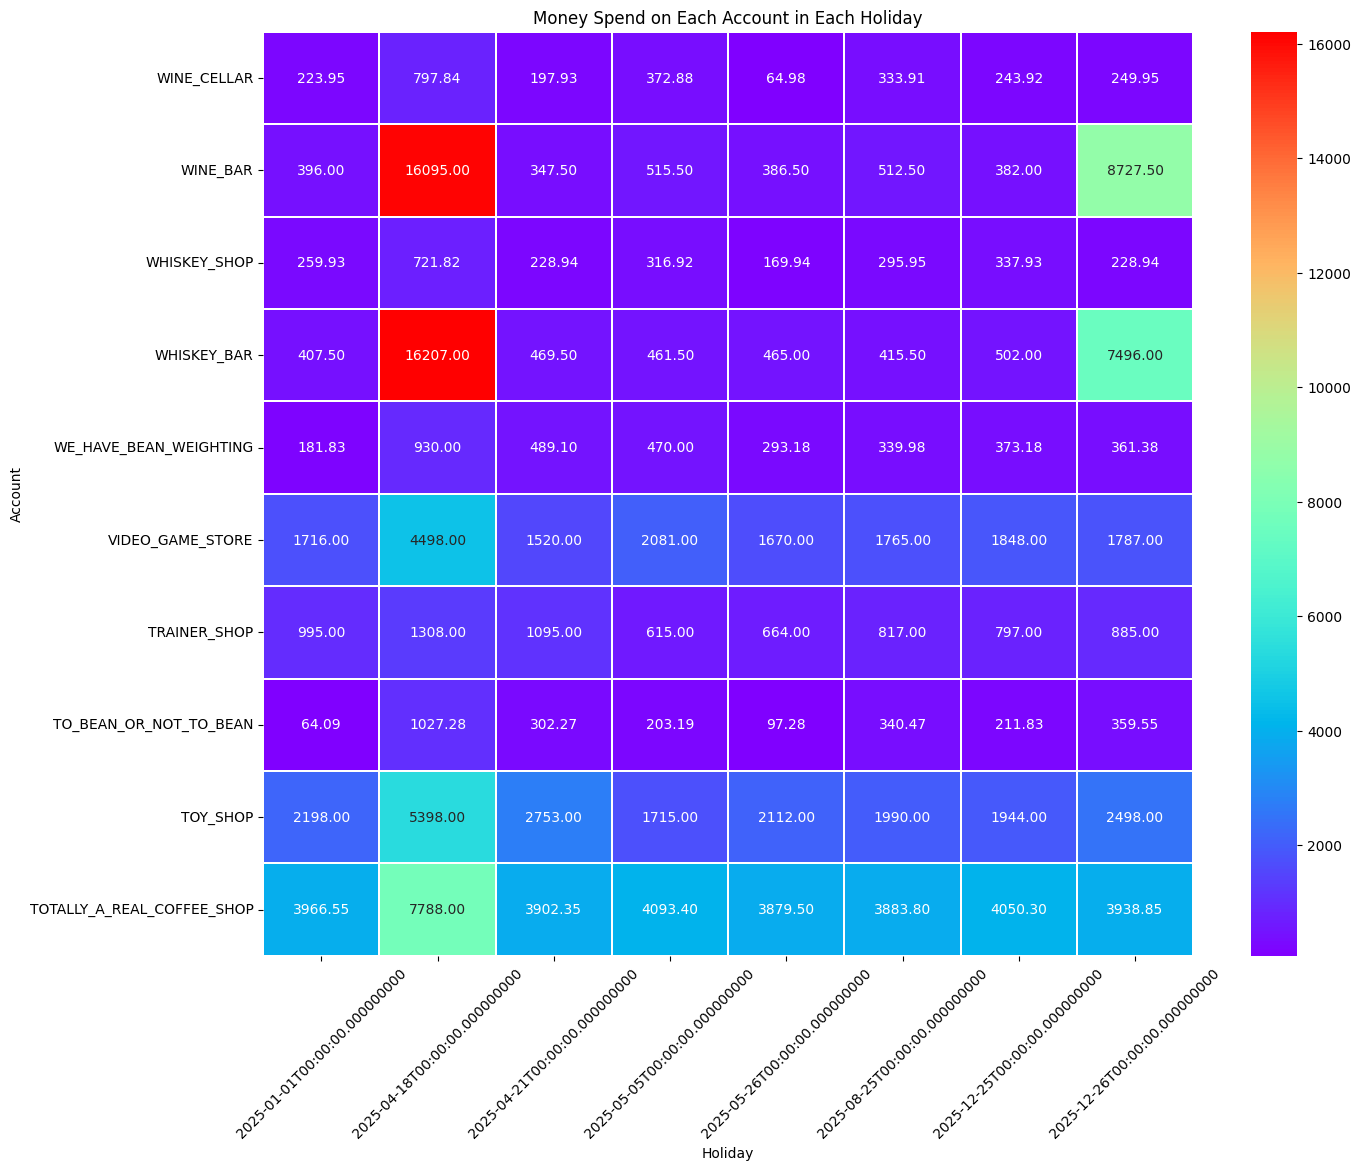

In [74]:
topten_2 = pivot_table_2.sort_values(by='to_randomly_generated_account', ascending = False).head(10)
plt.figure(figsize=(15, 12))
sns.heatmap(topten_2, cmap='rainbow', annot=True, fmt=".2f", linewidths=.2)
plt.title('Money Spend on Each Account in Each Holiday')
plt.xlabel('Holiday')
plt.ylabel('Account')
plt.xticks(rotation=45)

plt.savefig('heatmap_day.png', dpi=300, bbox_inches='tight')
    
plt.show()


## find account that make the most on each holiday

In [42]:
# find account that make the most on each holiday
max_account_per_holiday = pivot_table.idxmax(axis=0)
max_account_per_holiday

holiday
Boxing Day                Other
Christmas Day             Other
Early May bank holiday    Other
Easter Monday             Other
Good Friday               Other
New Year's Day            Other
Normal Day                Other
Spring bank holiday       Other
Summer bank holiday       Other
dtype: object

## find maximum monopoly_money_amount in each account

In [43]:
# extract month from 'not_happened_yet_date'
merged_df['transaction_month'] = merged_df['not_happened_yet_date'].dt.month

# calculate monthly average for 'monopoly_money_amount'
monthly_average_oneplace = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='mean')

print(monthly_average_oneplace.sort_values(by='monopoly_money_amount', ascending=False))


                               monopoly_money_amount
to_randomly_generated_account                       
TECH_SHOP                                     167.13
HIPSTER_ELECTRONICS_SHOP                      164.90
ELECTRONICS_SHOP                              162.64
DEPARTMENT_STORE                              115.56
FASHION_SHOP                                  114.57
...                                              ...
HIPSTER_COFFEE_SHOP                             2.42
A_CAFE                                          2.41
A_LOCAL_COFFEE_SHOP                             2.41
COFFEE_SHOP                                     2.41
TOTALLY_A_REAL_COFFEE_SHOP                      2.41

[80 rows x 1 columns]


### most of account that are top is not show category so i assume it is spended on private account 

I want to drop all private and see only commercial 

In [44]:
# reset  index to convert 'to_randomly_generated_account' to a real column
monthly_average_oneplace.reset_index(inplace=True)

# filter rows where contain only alphabet
monthly_average_oneplace = monthly_average_oneplace[monthly_average_oneplace['to_randomly_generated_account'].str.contains('[a-zA-Z]', regex=True)]
monthly_average_oneplace = monthly_average_oneplace.sort_values(by='monopoly_money_amount', ascending=False)
toptwenty = monthly_average_oneplace.head(20)
print(toptwenty)


   to_randomly_generated_account  monopoly_money_amount
67                     TECH_SHOP                 167.13
32      HIPSTER_ELECTRONICS_SHOP                 164.90
21              ELECTRONICS_SHOP                 162.64
18              DEPARTMENT_STORE                 115.56
24                  FASHION_SHOP                 114.57
13                  CLOTHES_SHOP                 114.40
23   FASHIONABLE_SPORTSWARE_SHOP                  75.71
72                  TRAINER_SHOP                  75.03
61                    SPORT_SHOP                  74.90
56                  RUNNING_SHOP                  74.28
3                  A_SUPERMARKET                  69.49
68               THE_SUPERMARKET                  69.40
22           EXPRESS_SUPERMARKET                  69.24
39             LARGE_SUPERMARKET                  68.87
73                   TURKEY_FARM                  59.03
70                      TOY_SHOP                  55.45
37          KIDS_ACTIVITY_CENTRE                

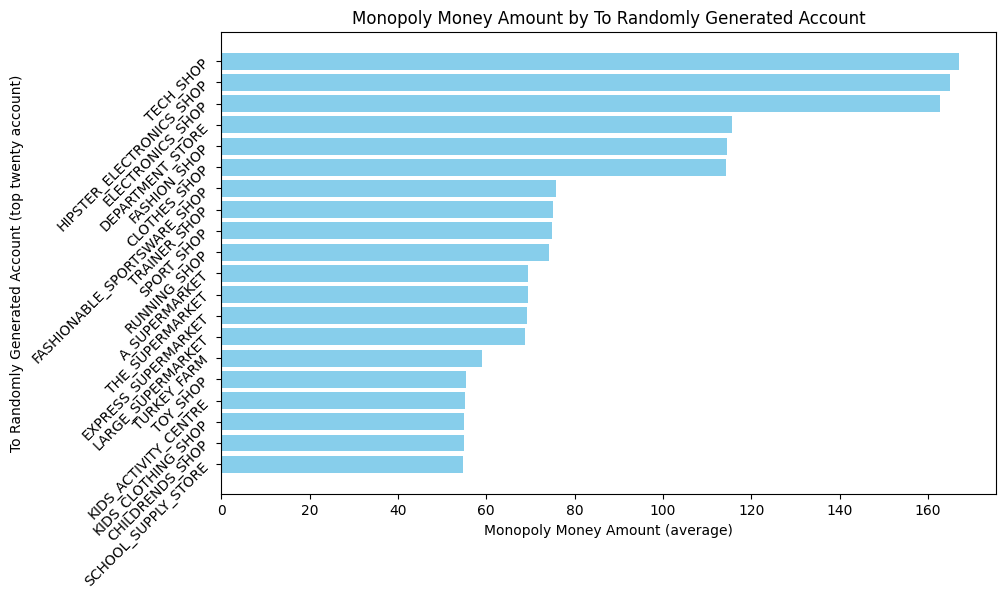

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(toptwenty['to_randomly_generated_account'], toptwenty['monopoly_money_amount'], color='skyblue')
plt.xlabel('Monopoly Money Amount (average)')
plt.ylabel('To Randomly Generated Account (top twenty account)')
plt.title('Monopoly Money Amount by To Randomly Generated Account')
plt.yticks(rotation=45, ha='right', fontsize=10)

plt.gca().invert_yaxis()  # invert y-axis to display the highest amount at the top
plt.show()


In [46]:
# calculate monthly average for 'monopoly_money_amount'
monthly_sum_oneplace = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='sum')

print(monthly_sum_oneplace.sort_values(by='monopoly_money_amount', ascending=False))

# reset  index to convert 'to_randomly_generated_account' to a real column
monthly_sum_oneplace.reset_index(inplace=True)

# filter rows where contain only alphabet
monthly_sum_oneplace = monthly_sum_oneplace[monthly_sum_oneplace['to_randomly_generated_account'].str.contains('[a-zA-Z]', regex=True)]
monthly_sum_oneplace = monthly_sum_oneplace.sort_values(by='monopoly_money_amount', ascending=False)
toptwenty = monthly_sum_oneplace.head(20)
print(toptwenty)



                               monopoly_money_amount
to_randomly_generated_account                       
Other                                    81537306.40
PUB                                      10699080.12
BAR                                       8509034.50
LOCAL_WATERING_HOLE                       7159024.50
EXPRESS_SUPERMARKET                       5717124.06
...                                              ...
PET_TOY_SHOP                               185839.00
TURKEY_FARM                                 98280.00
ACCESSORY_SHOP                              74980.00
JEWLLERY_SHOP                               71404.00
FLORIST                                      2675.00

[80 rows x 1 columns]
   to_randomly_generated_account  monopoly_money_amount
48                         Other            81537306.40
52                           PUB            10699080.12
4                            BAR             8509034.50
44           LOCAL_WATERING_HOLE             7159024.50
22      

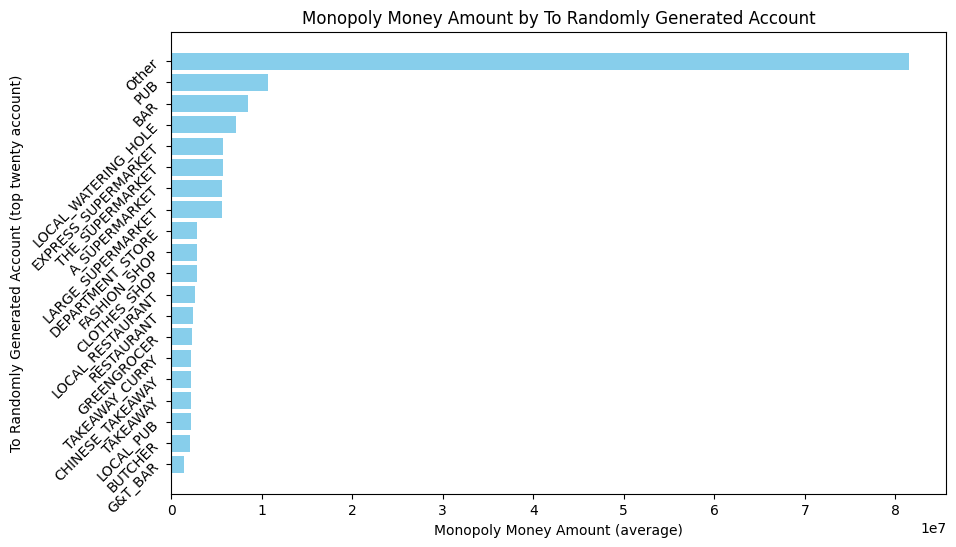

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(toptwenty['to_randomly_generated_account'], toptwenty['monopoly_money_amount'], color='skyblue')
plt.xlabel('Monopoly Money Amount (average)')
plt.ylabel('To Randomly Generated Account (top twenty account)')
plt.title('Monopoly Money Amount by To Randomly Generated Account')
plt.yticks(rotation=45, ha='right', fontsize=10)

plt.gca().invert_yaxis()  # invert y-axis to display the highest amount at the top
plt.show()


For Missing Value

https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/empirical-relation-between-mean-median-and-mode-1628764844.png


Thinking about missing value, I found Med, Mean, Mod and I got Positively Skewed.

In [48]:
# calculate median, mode, mean
median = fake_transaction['monopoly_money_amount'].median()
mode = fake_transaction['monopoly_money_amount'].mode().values[0]  # mode might return many values, so I will use the first value
mean = fake_transaction['monopoly_money_amount'].mean()

print("Median:", median)
print("Mode:", mode)
print("Mean:", mean)


Median: 6.0
Mode: 5.0
Mean: 18.393484954100593


Mode<Median<Mean

Positively Skewed -> so we will use the Median as the middle value instead mean